## Introduction

This notebook demonstrates pymatgen's functionality in terms of creating and editing molecules, as well as its integration with OpenBabel. For the latter, please note that you will need to have openbabel with python bindings installed. Please refer to pymatgen's documentation for installation details.

## Molecules

In [1]:
from pymatgen import Molecule
# Create a methane molecule.
coords = [[0.000000, 0.000000, 0.000000],
          [0.000000, 0.000000, 1.089000],
          [1.026719, 0.000000, -0.363000],
          [-0.513360, -0.889165, -0.363000],
          [-0.513360, 0.889165, -0.363000]]
mol = Molecule(["C", "H", "H", "H", "H"], coords)
print(mol)

Full Formula (H4 C1)
Reduced Formula: H4C
Charge = 0, Spin Mult = 1
Sites (5)
0 C     0.000000     0.000000     0.000000
1 H     0.000000     0.000000     1.089000
2 H     1.026719     0.000000    -0.363000
3 H    -0.513360    -0.889165    -0.363000
4 H    -0.513360     0.889165    -0.363000


In [2]:
# A Molecule is simply a list of Sites.
print(mol[0])
print(mol[1])

[0.0, 0.0, 0.0] C
[0.0, 0.0, 1.089] H


In [3]:
# Break a Molecule into two by breaking a bond.
for frag in mol.break_bond(0, 1):
    print(frag)

Full Formula (H3 C1)
Reduced Formula: H3C
Charge = 0, Spin Mult = 2
Sites (4)
0 C     0.000000     0.000000     0.000000
1 H     1.026719     0.000000    -0.363000
2 H    -0.513360    -0.889165    -0.363000
3 H    -0.513360     0.889165    -0.363000
Full Formula (H1)
Reduced Formula: H2
Charge = 0, Spin Mult = 2
Sites (1)
0 H     0.000000     0.000000     1.089000


In [4]:
# Getting neighbors that are within 3 angstroms from C atom.
print(mol.get_neighbors(mol[0], 3))

[(Site: H (0.0000, 0.0000, 1.0890), 1.089), (Site: H (1.0267, 0.0000, -0.3630), 1.0889999563640946), (Site: H (-0.5134, -0.8892, -0.3630), 1.0890004071739368), (Site: H (-0.5134, 0.8892, -0.3630), 1.0890004071739368)]


In [5]:
#Detecting bonds
print(mol.get_covalent_bonds())

[Covalent bond between [0.0, 0.0, 0.0] C and [0.0, 0.0, 1.089] H, Covalent bond between [0.0, 0.0, 0.0] C and [1.026719, 0.0, -0.363] H, Covalent bond between [0.0, 0.0, 0.0] C and [-0.51336, -0.889165, -0.363] H, Covalent bond between [0.0, 0.0, 0.0] C and [-0.51336, 0.889165, -0.363] H]


In [6]:
# If you need to run the molecule in a box with a periodic boundary condition
# code, you can generate the boxed structure as follows (in a 10Ax10Ax10A box)
structure = mol.get_boxed_structure(10, 10, 10)
print(structure)

Full Formula (H4 C1)
Reduced Formula: H4C
abc   :  10.000000  10.000000  10.000000
angles:  90.000000  90.000000  90.000000
Sites (5)
  #  SP           a         b       c
---  ----  --------  --------  ------
  0  H     0.5       0.5       0.6089
  1  H     0.602672  0.5       0.4637
  2  H     0.448664  0.411083  0.4637
  3  H     0.448664  0.588917  0.4637
  4  C     0.5       0.5       0.5


In [7]:
# Writing to XYZ files (easy to open with many molecule file viewers)
from pymatgen.io.xyz import XYZ
xyz = XYZ(mol)
xyz.write_file("methane.xyz")

## Openbabel interface

This section demonstrates pymatgen's integration with openbabel.

In [8]:
from pymatgen.io.babel import BabelMolAdaptor
import pybel as pb
a = BabelMolAdaptor(mol)
# Create a pybel.Molecule, which simplifies a lot of access
pm = pb.Molecule(a.openbabel_mol)
# Print canonical SMILES representation (unique and comparable).
print("Canonical SMILES = {}".format(pm.write("can")))
# Print Inchi representation
print("Inchi= {}".format(pm.write("inchi")))
# pb.outformats provides a listing of available formats. 
# Let's do a write to the commonly used PDB file.
pm.write("pdb", filename="methane.pdb", overwrite=True)

Canonical SMILES = C	

Inchi= InChI=1S/CH4/h1H4



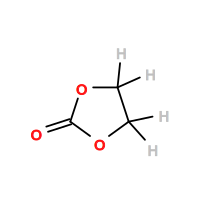

In [9]:
# Generating ethylene carbonate (SMILES obtained from Wikipedia)
# And displaying the svg.
ec = pb.readstring("smi", "C1COC(=O)O1")
ec.make3D()
from IPython.core.display import SVG, display_svg
svg = SVG(ec.write("svg"))
display_svg(svg)

## Input/Output

Pymatgen has built-in support for the XYZ and Gaussian, NWchem file formats. It also has support for most other file formats if you have openbabel with Python bindings installed.

In [10]:
print(mol.to(fmt="xyz"))
print(mol.to(fmt="g09"))
print(mol.to(fmt="pdb")) #Needs Openbabel.

mol.to(filename="methane.xyz")
mol.to(filename="methane.pdb") #Needs Openbabel.

print(Molecule.from_file("methane.pdb"))

5
H4 C1
C 0.000000 0.000000 0.000000
H 0.000000 0.000000 1.089000
H 1.026719 0.000000 -0.363000
H -0.513360 -0.889165 -0.363000
H -0.513360 0.889165 -0.363000
#P HF/6-31G(d) 

H4 C1

0 1
C
H 1 B1
H 1 B2 2 A2
H 1 B3 2 A3 3 D3
H 1 B4 2 A4 4 D4

B1=1.089000
B2=1.089000
A2=109.471221
B3=1.089000
A3=109.471213
D3=120.000017
B4=1.089000
A4=109.471213
D4=119.999966




COMPND    UNNAMED
AUTHOR    GENERATED BY OPEN BABEL 2.4.1
HETATM    1  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    2  H   UNL     1       0.000   0.000   1.089  1.00  0.00           H  
HETATM    3  H   UNL     1       1.027   0.000  -0.363  1.00  0.00           H  
HETATM    4  H   UNL     1      -0.513  -0.889  -0.363  1.00  0.00           H  
HETATM    5  H   UNL     1      -0.513   0.889  -0.363  1.00  0.00           H  
CONECT    1    3    4    5    2                                       
CONECT    2    1                                                      
CONECT    3    1              

For more fine-grained control over output, you can use the underlying IO classes Gaussian and Nwchem, two commonly used computational chemistry programs.

In [11]:
from pymatgen.io.gaussian import GaussianInput
gau = GaussianInput(mol, charge=0, spin_multiplicity=1, title="methane", 
                    functional="B3LYP", basis_set="6-31G(d)", 
                    route_parameters={'Opt': "", "SCF": "Tight"},
                    link0_parameters={"%mem": "1000MW"})
print(gau)

%mem=1000MW
#P B3LYP/6-31G(d) Opt SCF=Tight

methane

0 1
C
H 1 B1
H 1 B2 2 A2
H 1 B3 2 A3 3 D3
H 1 B4 2 A4 4 D4

B1=1.089000
B2=1.089000
A2=109.471221
B3=1.089000
A3=109.471213
D3=120.000017
B4=1.089000
A4=109.471213
D4=119.999966






In [12]:
# A standard relaxation + SCF energy nwchem calculation input file for methane.
from pymatgen.io.nwchem import NwTask, NwInput
tasks = [
    NwTask.dft_task(mol, operation="optimize", xc="b3lyp",
                    basis_set="6-31G"),
    NwTask.dft_task(mol, operation="freq", xc="b3lyp",
                    basis_set="6-31G"),
    NwTask.dft_task(mol, operation="energy", xc="b3lyp",
                    basis_set="6-311G"),
]
nwi = NwInput(mol, tasks, geometry_options=["units", "angstroms"])
print(nwi)

geometry units angstroms
 C 0.0 0.0 0.0
 H 0.0 0.0 1.089
 H 1.026719 0.0 -0.363
 H -0.51336 -0.889165 -0.363
 H -0.51336 0.889165 -0.363
end

title "H4C1 dft optimize"
charge 0
basis cartesian
 C library "6-31G"
 H library "6-31G"
end
dft
 mult 1
 xc b3lyp
end
task dft optimize

title "H4C1 dft freq"
charge 0
basis cartesian
 C library "6-31G"
 H library "6-31G"
end
dft
 mult 1
 xc b3lyp
end
task dft freq

title "H4C1 dft energy"
charge 0
basis cartesian
 C library "6-311G"
 H library "6-311G"
end
dft
 mult 1
 xc b3lyp
end
task dft energy



## This concludes the demo on pymatgen's basic capabilities for molecules.